In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyhf
import logging
from pyhf import hfpdf
def prep_data(sourcedata):
    spec =  {
        'signal': {
            'signal': {
                'data': sourcedata['signal']['bindata']['sig'],
                'mods': [
                    {
                        'name': 'mu',
                        'type': 'normfactor',
                        'data': None
                    }
                ]
            },
            'background': {
                'data': sourcedata['signal']['bindata']['bkg'],
                'mods': [
                    {
                        'name': 'uncorr_bkguncrt_signal',
                        'type': 'shapesys',
                        'data': sourcedata['signal']['bindata']['bkgerr']
                    }
                ]
            }
        },
        'control': {
            'background': {
                'data': sourcedata['control']['bindata']['bkg'],
                'mods': [
                    {
                        'name': 'uncorr_bkguncrt_control',
                        'type': 'shapesys',
                        'data': sourcedata['control']['bindata']['bkgerr']
                    }
                ]
            }            
        }
    }
    pdf  = hfpdf(spec)
    data = []
    for c in pdf.config.channel_order:
        data += sourcedata[c]['bindata']['data']
    data = data + pdf.auxdata
    return data, pdf

In [3]:
source = {
  "channels": {
    "signal": {
      "binning": [2,-0.5,1.5],
      "bindata": {
        "data":    [110.0, 155.0],
        "bkgerr":  [10.0, 10.0],
        "bkg":     [100.0, 150.0],
        "sig":     [10.0, 35.0]
      }
    },
    "control": {
      "binning": [2,-0.5,1.5],
      "bindata": {
        "data":    [205.0, 345.0],
        "bkg":     [200.0, 350.0],
        "bkgerr":  [5.0, 10.0]
      }
    }
  }
}

d,pdf = prep_data(source['channels'])

print (d)

init_pars = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()


print (pdf.pdf(init_pars, d))

unconpars = pyhf.unconstrained_bestfit(d,pdf,init_pars,par_bounds)
print ('UNCON',unconpars)


# print d
# print pdf.expected_data(unconpars)


conpars = pyhf.constrained_bestfit(0.0,d,pdf,init_pars,par_bounds)
print ('CONS', conpars)


# print pdf.expected_data(conpars)

# # print '????',aux
# aux = pdf.expected_auxdata(conpars)
# # print '????',aux

# print 'ASIMOV',pyhf.generate_asimov_data(0.0,d,pdf,init_pars,par_bounds)

[205.0, 345.0, 110.0, 155.0, 1600.0, 1225.0, 100.0, 225.0]
6.444423901300363e-15
UNCON [1.00225339 0.99620861 1.03451146 0.99071728 0.21647201]


/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:335: RuntimeWarning: divide by zero encountered in log
  sum = sum + np.log(_poisson_impl(d, lam))
/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:323: RuntimeWarning: divide by zero encountered in log
  sum = sum + np.log(mod.pdf(a, alpha))
/Users/lukas/Code/histfactory/pyhf/venv35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


CONS [1.00225277 0.99620813 1.04620509 1.01080135 0.        ]


/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:335: RuntimeWarning: divide by zero encountered in log
  sum = sum + np.log(_poisson_impl(d, lam))
/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:323: RuntimeWarning: divide by zero encountered in log
  sum = sum + np.log(mod.pdf(a, alpha))
/Users/lukas/Code/histfactory/pyhf/venv35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:386: RuntimeWarning: divide by zero encountered in double_scalars
  CLs  = CLb/CLsb


{'exp': [0.4611497308300985,
  0.6198028977147109,
  0.8655524322686742,
  1.2182219249565427,
  1.6572753954774475],
 'obs': 1.0303284074475123}

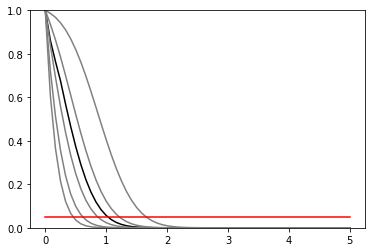

In [4]:
def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

def CLsOnePoint(muTest,d,pdf, init_pars,par_bounds):
    clsobs, cls_exp = pyhf.runOnePoint(muTest, d,pdf,init_pars,par_bounds)[-2:]
    return 1./clsobs, [1./x for x in cls_exp]

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross


CLsOnePoint(1.0,d,pdf,init_pars,par_bounds)


mutests = np.linspace(0,5,61)
tests = [CLsOnePoint(muTest,d,pdf,init_pars,par_bounds) for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]

plot_results(mutests, cls_obs, cls_exp)

invert_interval(mutests, cls_obs, cls_exp)




In [6]:
pdf.config.par_map

{'mu': {'mod': None,
  'slice': slice(4, 5, None),
  'suggested_bounds': [[0, 10]],
  'suggested_init': [1.0]},
 'uncorr_bkguncrt_control': {'mod': <pyhf.shapesys_constraint at 0x10ae64b38>,
  'slice': slice(0, 2, None),
  'suggested_bounds': [[0, 10], [0, 10]],
  'suggested_init': [1.0, 1.0]},
 'uncorr_bkguncrt_signal': {'mod': <pyhf.shapesys_constraint at 0x10ae64438>,
  'slice': slice(2, 4, None),
  'suggested_bounds': [[0, 10], [0, 10]],
  'suggested_init': [1.0, 1.0]}}